In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colors
plt.rcParams['figure.figsize'] = (11, 7)

from collections import Counter
import numpy as np

from lsst.daf.persistence import Butler
from lsst.geom import Point2D, Box2D, Point2I, Box2I, Extent2I
from lsst.afw.image import Image, LOCAL
from pfs.datamodel import TargetType, FiberStatus
from pfs.drp.stella.referenceLine import ReferenceLineStatus
import lsst.display.matplotlib
import matplotlib.cm
from matplotlib.colors import Normalize
from lsst.afw.display import Display, RED, YELLOW, GREEN
Display.setDefaultBackend("matplotlib")

import logging
logger = logging.getLogger(__name__)
logger.setLevel(logging.DEBUG)
consoleHandler = logging.StreamHandler()
consoleHandler.setLevel(logging.DEBUG)
formatter = logging.Formatter("%(asctime)s - %(name)s - %(levelname)s - %(message)s")
consoleHandler.setFormatter(formatter)
logger.addHandler(consoleHandler)

In [3]:
butler = Butler("/work/drp/rerun/price/pipe2d-1440")
dataId = dict(visit=109306, arm="n", spectrograph=3)
pfsArm = butler.get("pfsArm", dataId)
pfsConfig = butler.get("pfsConfig", dataId).select(spectrograph=3)

/tmp/ipykernel_105146/1615284195.py:1: FutureWarning: Gen2 Butler has been deprecated (Butler). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = Butler("/work/drp/rerun/price/pipe2d-1440")
/tmp/ipykernel_105146/1615284195.py:1: FutureWarning: Gen2 Butler has been deprecated (PfsMapper). It will be removed sometime after v23.0 but no earlier than the end of 2021.
  butler = Butler("/work/drp/rerun/price/pipe2d-1440")


lsst.CameraMapper INFO: Loading exposure registry from /work/drp/registry.pgsql
lsst.CameraMapper INFO: Loading calib registry from /work/drp/CALIB/calibRegistry.sqlite3
lsst.CameraMapper INFO: Loading calib registry from /work/drp/CALIB/calibRegistry.sqlite3


Text(0.5, 1.0, "{'visit': 109306, 'arm': 'n', 'spectrograph': 3}")

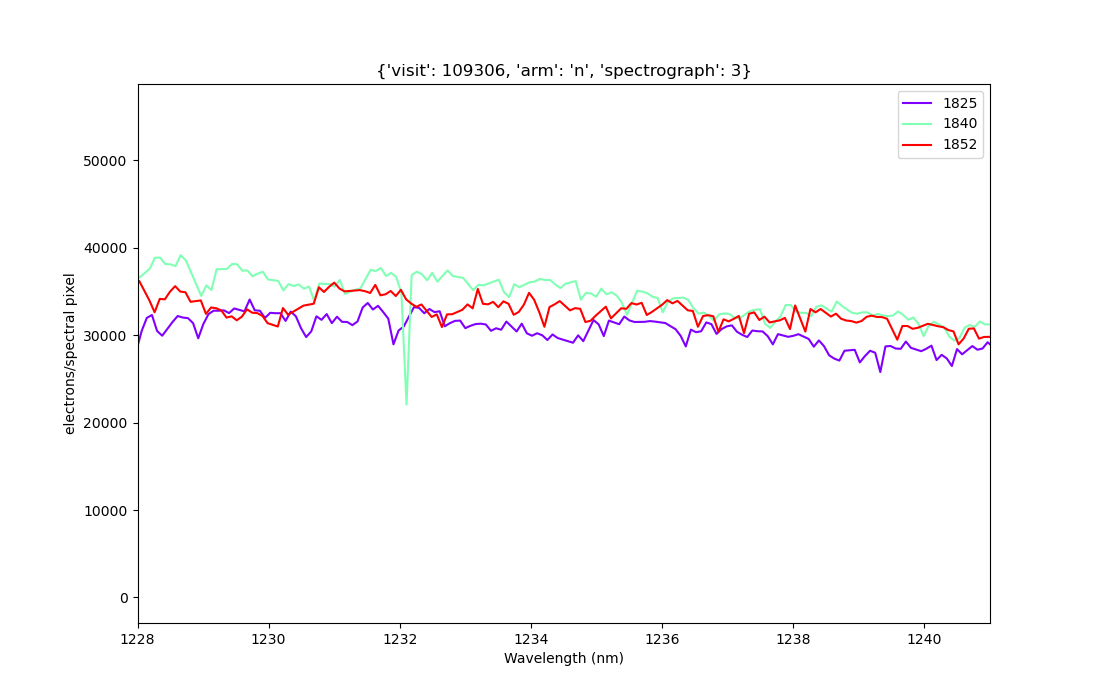

In [7]:
plt.close("all")

fig, axes = pfsArm.plot(fiberId=[1825, 1840, 1852], ignorePixelMask=pfsArm.flags.get("NO_DATA"), show=False)
axes.set_xlim(1228, 1241)
axes.legend()
axes.set_title(str(dataId))

In [12]:
[f"{','.join(pfsArm.flags.interpret(kk))}: {vv}" for kk, vv in Counter(pfsArm.mask.flatten()).items()]

[': 2252291',
 'BAD_FIBERTRACE,NO_DATA: 181127',
 'IPC: 21749',
 'CR: 2364',
 'CR,IPC: 10',
 'BAD: 54',
 'BAD,IPC: 5']

In [13]:
181127/2252291

0.08041900447144708